In [1]:
! pip install -U scikit-learn

  Using cached https://files.pythonhosted.org/packages/f5/ef/bcd79e8d59250d6e8478eb1290dc6e05be42b3be8a86e3954146adbc171a/scikit_learn-0.24.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/61/cf/6e354304bcb9c6413c4e02a747b600061c21d38ba51e7e544ac7bc66aecc/threadpoolctl-3.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7c/91/d3ba0401e62d7e42816bc7d97b82d19c95c164b3e149a87c0a1c026a735e/joblib-1.1.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/b2/6c7545bb7a38754d63048c7696804a0d947328125d81bf12beaa692c3ae3/numpy-1.19.5-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: numpy 1.11.3
    Uninstalling numpy-1.11.3:
      Successfully uninstalled numpy-1.11.3
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3


In [1]:
import illustris_python as il
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_validate, KFold, cross_val_predict, GridSearchCV

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

In [3]:
basePath = '../sims.TNG/TNG100-1/output'

In [4]:
mtype = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloMassType'])
gmetal = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloGasMetallicity'])
sfr = il.groupcat.loadSubhalos(basePath, 91, fields=['SubhaloSFR'])

In [5]:
sfr.shape

(4449889,)

In [6]:
pdgmetal = pd.DataFrame(gmetal, columns=['Gas Metallicity'])
pdsfr = pd.DataFrame(sfr, columns=['Stellar Formation Rate'])

In [7]:
gmass = mtype[:,0]
dmmass = mtype[:,1]
stmass = mtype[:,4]
bhmass = mtype[:,5]

In [8]:
pdgmass = np.log10((pd.DataFrame(gmass, columns=['Gas Mass']))*(10**10))
pddmmass = np.log10((pd.DataFrame(dmmass, columns=['Dark Matter Mass']))*(10**10))
pdstmass = np.log10((pd.DataFrame(stmass, columns=['Stellar Mass']))*(10**10))
pdbhmass = np.log10((pd.DataFrame(bhmass, columns=['Black Hole Mass']))*(10**10))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


In [9]:
pdgmass

,Gas Mass
0,13.560769
1,10.616129
2,9.833847
3,8.702189
4,10.616082
5,10.349732
6,8.778911
7,9.376182
8,8.580060
9,-inf


In [10]:
pdgmetal.replace(to_replace = 0, value = 10**-8, inplace=True)
pdsfr.replace(to_replace = 0, value = 10**-8, inplace=True)
pdgmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pddmmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdstmass.replace(to_replace = -np.inf, value = 8, inplace=True)
pdbhmass.replace(to_replace = -np.inf, value = 8, inplace=True) 

pdgmetal.fillna(0,inplace=True)
pdsfr.fillna(0,inplace=True)
pdgmass.fillna(0,inplace=True)
pddmmass.fillna(0,inplace=True)
pdstmass.fillna(0,inplace=True)
pdbhmass.fillna(0,inplace=True)

In [11]:
df['Gas Metallicity'] = df['Gas Metallicity'][(df['Gas Metallicity'] != 10**-8) & (~np.isinf(df['Gas Metallicity']))]
df['Stellar Formation Rate'] = df['Stellar Formation Rate'][(df['Stellar Formation Rate'] != 10**-8) & (~np.isinf(df['Stellar Formation Rate']))]
df['Gas Mass'] = df['Gas Mass'][(df['Gas Mass'] != 8) & (~np.isinf(df['Gas Mass']))]
df['Stellar Mass'] = df['Stellar Mass'][(df['Stellar Mass'] != 8) & (~np.isinf(df['Stellar Mass']))]
df['Black Hole Mass'] = df['Black Hole Mass'][(df['Black Hole Mass'] != 8) & (~np.isinf(df['Black Hole Mass']))]
df['Dark Matter Mass'] = df['Dark Matter Mass'][(df['Dark Matter Mass'] != 8) & (~np.isinf(df['Dark Matter Mass']))]

In [12]:
ddf = df.dropna()

In [13]:
Features = ddf[['Gas Metallicity', 'Stellar Formation Rate', 'Gas Mass', 'Stellar Mass', 'Black Hole Mass']]
Target = ddf['Dark Matter Mass']
X_train, X_test, Y_train, Y_test = train_test_split(Features, Target, test_size=0.1)

In [14]:
X_train.shape

(30747, 5)

In [20]:
Target.shape

(34164,)

prediction :  [ 10.60941887  10.97646141  10.96949863 ...,  10.61355495  11.938694
  10.94615269]
R2 Score :  0.837838097733
The mean square value :  0.043532756876
The Score :  {'fit_time': array([ 0.21774817,  0.21656036,  0.2134788 ,  0.21528149,  0.21185899,
        0.21718669,  0.21388078]), 'score_time': array([ 0.00288606,  0.00243187,  0.0024724 ,  0.00265241,  0.00261068,
        0.00258803,  0.00254011]), 'test_score': array([ 0.86491347,  0.84683228,  0.84344752,  0.85163812,  0.83208918,
        0.85430066,  0.83732682]), 'train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])}
Test Score :  0.847221147945
Train Score :  0.999999995986
Cross Vaidate prediction :  [ 14.05238056  12.47539806  11.25655079 ...,   9.05208969   8.91862869
  10.05267334]


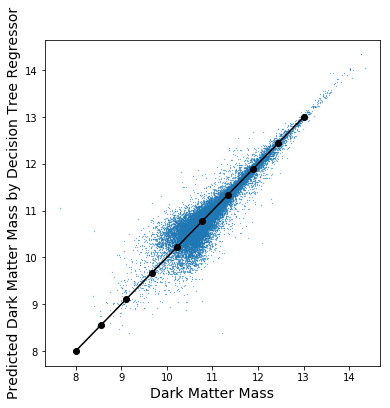

In [15]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

m = np.linspace(8, 13, 10)
n = m


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(Target,Cvpred, '.', markersize=0.5)
ax.plot(m, n, color='black', linestyle='-', marker='o')
ax.set_xlabel('Dark Matter Mass', fontsize=14)
ax.set_ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)
plt.show()

prediction :  [ 10.60941887  10.99104881  10.96949863 ...,  10.61839294  11.938694
  10.94615269]
R2 Score :  0.839104360252
The mean square value :  0.0431928256245
The Score :  {'fit_time': array([ 0.21508837,  0.21654129,  0.21600103,  0.21104836,  0.20935512,
        0.21821332,  0.21464682]), 'score_time': array([ 0.00274897,  0.00227976,  0.00236058,  0.00213695,  0.00263047,
        0.00280309,  0.00234294]), 'test_score': array([ 0.86067542,  0.85170534,  0.84280817,  0.85313249,  0.83363775,
        0.85399439,  0.83825392]), 'train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])}
Test Score :  0.847743924195
Train Score :  0.999999995986
Cross Vaidate prediction :  [ 14.26383114  12.47539806  11.25655079 ...,   9.72290134   8.91862869
  10.05267334]
Pearson Correlation Coefficient: 0.923772008646
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Decision Tree Regressor')

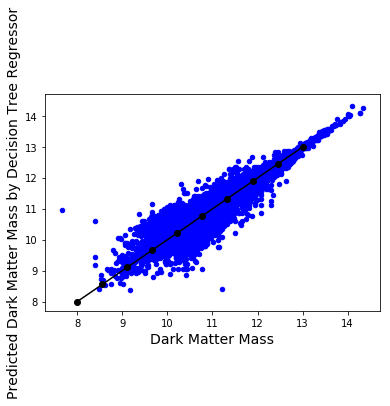

In [21]:
Regressor = DecisionTreeRegressor()
Regressor.fit(X_train, Y_train)
Y_pred = Regressor.predict(X_test)
print ("prediction : ", Y_pred)

R = r2_score(Y_test, Y_pred)
print ("R2 Score : ", R)

Mse = mean_squared_error(Y_test, Y_pred)
print ("The mean square value : ", Mse)

Scores = cross_validate(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
S = np.mean(Scores['test_score'])
print ("The Score : ", Scores)
print ("Test Score : ", S)
print ("Train Score : ", np.mean(Scores['train_score']))

Cvpred = cross_val_predict(Regressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", Cvpred)

C_coeff, P_value = stats.pearsonr(Cvpred.reshape((34164,)), Target)
print("Pearson Correlation Coefficient:", C_coeff)
print("P-value:", P_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,Cvpred, s = 20, c = 'blue')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Decision Tree Regressor',fontsize=14)

prediction :  [ 10.0701189   10.91090679  10.71609211 ...,  10.64775753  11.89992523
  10.87975025]
R2 Score :  0.880655960401
The mean square value :  0.0320382
The Score :  {'fit_time': array([ 0.01482034,  0.01407051,  0.01282787,  0.01315928,  0.01299286,
        0.01407385,  0.01363182]), 'score_time': array([ 0.0227623 ,  0.02375984,  0.02296662,  0.02348828,  0.02226329,
        0.0232718 ,  0.02158618]), 'test_score': array([ 0.89223452,  0.88568087,  0.88066887,  0.88660841,  0.88389368,
        0.88754106,  0.89201519]), 'train_score': array([ 0.9437193 ,  0.94369976,  0.94486726,  0.94438217,  0.94515825,
        0.94477532,  0.94396856])}
Test Score :  0.88694894479
Train Score :  0.944367229904
Cross Vaidate prediction :  [ 13.63830948  13.53661633  11.77884388 ...,  10.07795429   9.56298923
   8.77123642]
Pearson Correlation Coefficient: 0.941935
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by KNN Regressor')

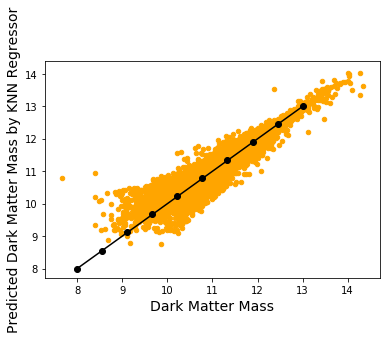

In [22]:
KnnRegressor = KNeighborsRegressor(n_neighbors=3)
KnnRegressor.fit(X_train, Y_train)
KY_pred = KnnRegressor.predict(X_test)
print ("prediction : ", KY_pred)

KR = r2_score(Y_test, KY_pred)
print ("R2 Score : ", KR)

KMse = mean_squared_error(Y_test, KY_pred)
print ("The mean square value : ", KMse)

KScores = cross_validate(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
KS = np.mean(KScores['test_score'])
print ("The Score : ", KScores)
print ("Test Score : ", KS)
print ("Train Score : ", np.mean(KScores['train_score']))

KCvpred = cross_val_predict(KnnRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", KCvpred)

KC_coeff, KP_value = stats.pearsonr(KCvpred.reshape((34164,)), Target)
print("Pearson Correlation Coefficient:", KC_coeff)
print("P-value:", KP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,KCvpred, s = 20, c = 'orange')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by KNN Regressor',fontsize=14)

prediction :  [ 10.13428879  10.8900156   10.89549541 ...,  10.54123592  11.96962166
  10.86534214]
R2 Score :  0.851238813639
The mean square value :  0.0399353
The Score :  {'fit_time': array([ 0.00586128,  0.00521374,  0.00565147,  0.00516796,  0.00511551,
        0.00508285,  0.0051496 ]), 'score_time': array([ 0.00141788,  0.00285554,  0.00153494,  0.0015378 ,  0.00146294,
        0.00651455,  0.00234914]), 'test_score': array([ 0.84708392,  0.84393235,  0.85098539,  0.85849803,  0.84899883,
        0.85587173,  0.84742732]), 'train_score': array([ 0.85121423,  0.85169049,  0.85054948,  0.84921392,  0.85086839,
        0.84973739,  0.8511552 ])}
Test Score :  0.850399651148
Train Score :  0.850632728041
Cross Vaidate prediction :  [ 13.82304668  12.03627205  11.93209171 ...,   9.64184189   9.84890652
   9.78356934]
Pearson Correlation Coefficient: 0.922217
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Linear Regressor')

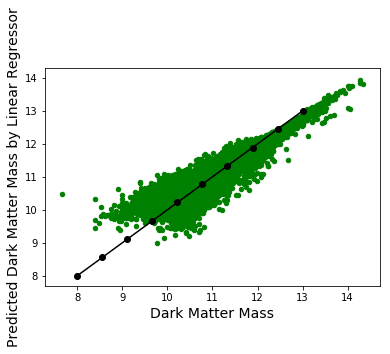

In [23]:
LRegressor = LinearRegression()
LRegressor.fit(X_train, Y_train)
LY_pred = LRegressor.predict(X_test)
print ("prediction : ", LY_pred)

LR = r2_score(Y_test, LY_pred)
print ("R2 Score : ", LR)

LMse = mean_squared_error(Y_test, LY_pred)
print ("The mean square value : ", LMse)

LScores = cross_validate(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
LS = np.mean(LScores['test_score'])
print ("The Score : ", LScores)
print ("Test Score : ", LS)
print ("Train Score : ", np.mean(LScores['train_score']))

LCvpred = cross_val_predict(LRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", LCvpred)

LC_coeff, LP_value = stats.pearsonr(LCvpred.reshape((34164,)), Target)
print("Pearson Correlation Coefficient:", LC_coeff)
print("P-value:", LP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,LCvpred, s = 20, c = 'green')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Linear Regressor',fontsize=14)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


prediction :  [ 10.23692541  10.90968313  10.88657598 ...,  10.63224792  11.88979406
  10.9266441 ]
R2 Score :  0.910042579098
The mean square value :  0.0241492883259
The Score :  {'fit_time': array([ 1.24227643,  1.22596979,  1.20961022,  1.23403335,  1.23812199,
        1.26985025,  1.25009704]), 'score_time': array([ 0.01644707,  0.01449776,  0.01546788,  0.01584935,  0.0160923 ,
        0.01672292,  0.01521468]), 'test_score': array([ 0.91868319,  0.91286211,  0.91452718,  0.91365581,  0.90582429,
        0.91782874,  0.91269093]), 'train_score': array([ 0.984859  ,  0.98456751,  0.98465266,  0.98448971,  0.98470756,
        0.98467129,  0.98435398])}
Test Score :  0.913724607059
Train Score :  0.984614529718
Cross Vaidate prediction :  [ 14.10938635  12.33433542  11.23369694 ...,   9.81263065   9.41309586
  10.01575871]
Pearson Correlation Coefficient: 0.955658252342
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Random Forest Regressor')

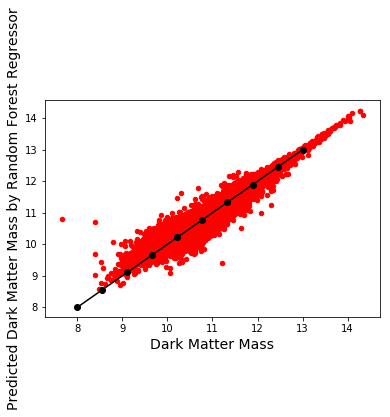

In [24]:
FORegressor = RandomForestRegressor()
FORegressor.fit(X_train, Y_train)
FOY_pred = FORegressor.predict(X_test)
print ("prediction : ", FOY_pred)

FOR = r2_score(Y_test, FOY_pred)
print ("R2 Score : ", FOR)

FOMse = mean_squared_error(Y_test, FOY_pred)
print ("The mean square value : ", FOMse)

FOScores = cross_validate(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
FOS = np.mean(FOScores['test_score'])
print ("The Score : ", FOScores)
print ("Test Score : ", FOS)
print ("Train Score : ", np.mean(FOScores['train_score']))

FOCvpred = cross_val_predict(FORegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", FOCvpred)

FC_coeff, FP_value = stats.pearsonr(FOCvpred.reshape((34164,)), Target)
print("Pearson Correlation Coefficient:", FC_coeff)
print("P-value:", FP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,FOCvpred, s = 20, c = 'red')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Random Forest Regressor',fontsize=14)

prediction :  [ 10.1645333   10.9001123   10.79531499 ...,  10.63648111  11.89958606
  10.91695187]
R2 Score :  0.915025152964
The mean square value :  0.022811704259
The Score :  {'fit_time': array([ 4.17335057,  4.07006693,  4.12126541,  4.12244749,  4.09343743,
        4.1180191 ,  4.12173247]), 'score_time': array([ 0.20113397,  0.18248844,  0.17785382,  0.18047452,  0.17833972,
        0.17867255,  0.17767692]), 'test_score': array([ 0.92255078,  0.91825867,  0.91830208,  0.91911095,  0.91548412,
        0.92276283,  0.92109589]), 'train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.])}
Test Score :  0.919652189689
Train Score :  0.999999999859
Cross Vaidate prediction :  [ 14.2019301   12.48558352  11.83704599 ...,   9.78760805   9.54087033
   9.62949604]
Pearson Correlation Coefficient: 0.959015415127
P-value: 0.0


Text(0,0.5,'Predicted Dark Matter Mass by Extreme Random Forest Regressor')

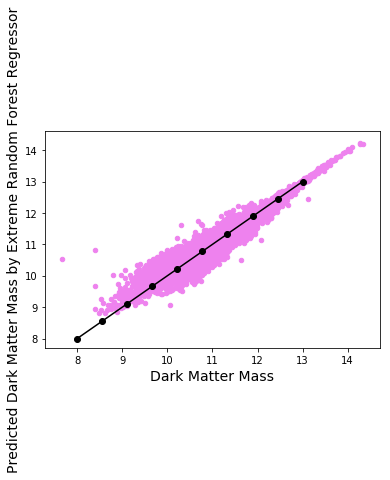

In [25]:
ETRegressor = ExtraTreesRegressor(n_estimators=100, random_state=33)
ETRegressor.fit(X_train, Y_train)
ETY_pred = ETRegressor.predict(X_test)
print ("prediction : ", ETY_pred)

ETR = r2_score(Y_test, ETY_pred)
print ("R2 Score : ", ETR)

ETMse = mean_squared_error(Y_test, ETY_pred)
print ("The mean square value : ", ETMse)

ETScores = cross_validate(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10), return_train_score=True)
ETS = np.mean(ETScores['test_score'])
print ("The Score : ", ETScores)
print ("Test Score : ", ETS)
print ("Train Score : ", np.mean(ETScores['train_score']))

ETCvpred = cross_val_predict(ETRegressor,Features,Target, cv = KFold(n_splits=7, shuffle=True, random_state=10))
print ("Cross Vaidate prediction : ", ETCvpred)

ETC_coeff, ETP_value = stats.pearsonr(ETCvpred.reshape((34164,)), Target)
print("Pearson Correlation Coefficient:", ETC_coeff)
print("P-value:", ETP_value)

m = np.linspace(8, 13, 10)
n = m
plt.plot(m, n, color='black', linestyle='-', marker='o')

plt.scatter(Target,ETCvpred, s = 20, c = 'violet')
plt.xlabel('Dark Matter Mass', fontsize=14)
plt.ylabel('Predicted Dark Matter Mass by Extreme Random Forest Regressor',fontsize=14)

 Model Comparisons for Case 2 


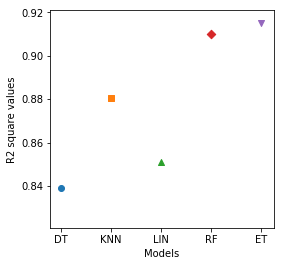

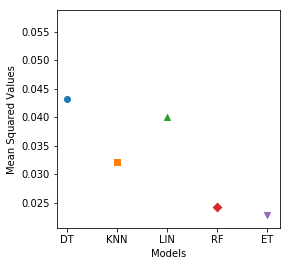

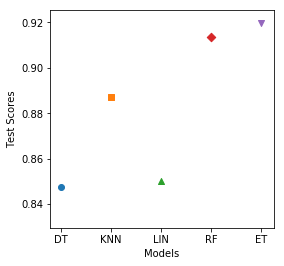

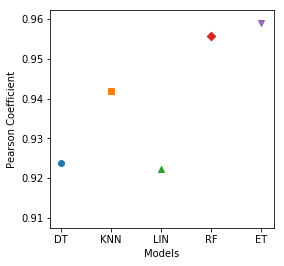

In [26]:
#COMPARISON GRAPH (CASE 2)

print ("\033[1m Model Comparisons for Case 2 \033[0m")

#R square
plt.figure(figsize=(4, 4))
g = [R, KR, LR, FOR, ETR]
h = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(g)):
    plt.scatter(h[i], g[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('R2 square values')
plt.show()

#Mean Squared Error

plt.figure(figsize=(4, 4))
gg = [Mse, KMse, LMse, FOMse, ETMse]
hh = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for i in range(len(gg)):
    plt.scatter(hh[i], gg[i], marker=shapes[i])
plt.xlabel('Models')
plt.ylabel('Mean Squared Values')
plt.show()

#Test Scores

plt.figure(figsize=(4, 4))
G = [S, KS, LS, FOS, ETS]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Test Scores')
plt.show()

#Pearson Correlation

plt.figure(figsize=(4, 4))
G = [C_coeff, KC_coeff, LC_coeff, FC_coeff, ETC_coeff]
H = ['DT', 'KNN', 'LIN', 'RF', 'ET']
shapes = ['o', 's', '^', 'D', 'v']
for j in range(len(G)):
    plt.scatter(H[j], G[j], marker=shapes[j])
plt.xlabel('Models')
plt.ylabel('Pearson Coefficient')
plt.show()